In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
import sys
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
(X_train, Y_train), (X_test,Y_test) = mnist.load_data()
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수  : %d 개" % (X_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수  : 10000 개


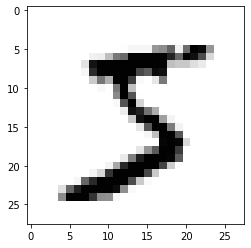

In [3]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [4]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
        sys.stdout.write('\n')

0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
3	
18	
18	
18	
126	
136	
175	
26	
166	
255	
247	
127	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
30	
36	
94	
154	
170	
253	
253	
253	
253	
253	
225	
172	
253	
242	
195	
64	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
49	
238	
253	
253	
253	
253	
253	
253	
253	
253	
251	
93	
82	
82	
56	
39	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
18	
219	
253	
253	
253	
253	
253	
198	
182	
247	
241	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
80	
156	
107	
253	
253	
205	
11	
0	
43	
154	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
14	
1	
154	
253	
90	
0	
0

In [5]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_train = X_train.astype(float)
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], -1).astype(float) / 255

In [6]:
print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [7]:
print("target : %d " % (Y_train[0]))

target : 5 


In [8]:
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)
print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu')) #401920
model.add(Dense(10, activation='softmax')) # 5130

In [11]:
import os


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpoint = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [12]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0,\
                   callbacks=[early_stopping_callback,checkpoint])


Epoch 00001: val_loss improved from inf to 0.15201, saving model to ./model\01-0.1520.hdf5

Epoch 00002: val_loss improved from 0.15201 to 0.10285, saving model to ./model\02-0.1028.hdf5

Epoch 00003: val_loss improved from 0.10285 to 0.08282, saving model to ./model\03-0.0828.hdf5

Epoch 00004: val_loss improved from 0.08282 to 0.07257, saving model to ./model\04-0.0726.hdf5

Epoch 00005: val_loss improved from 0.07257 to 0.06795, saving model to ./model\05-0.0679.hdf5

Epoch 00006: val_loss did not improve from 0.06795

Epoch 00007: val_loss improved from 0.06795 to 0.06202, saving model to ./model\07-0.0620.hdf5

Epoch 00008: val_loss improved from 0.06202 to 0.05980, saving model to ./model\08-0.0598.hdf5

Epoch 00009: val_loss improved from 0.05980 to 0.05893, saving model to ./model\09-0.0589.hdf5

Epoch 00010: val_loss improved from 0.05893 to 0.05640, saving model to ./model\10-0.0564.hdf5

Epoch 00011: val_loss improved from 0.05640 to 0.05622, saving model to ./model\11-0.05

In [13]:
print("\n Test Accuracy: %.4f" % \
     (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.0633 - accuracy: 0.9836

 Test Accuracy: 0.9836


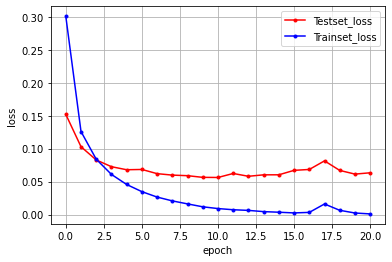

In [14]:
Y_vloss = history.history['val_loss'] # Test
Y_loss = history.history['loss'] # Training

x_len = np.arange(len(Y_loss))
plt.plot(x_len, Y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, Y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()